In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pio.renderers.default = 'notebook' 
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

In [25]:
# data_dir = 'Data/spain/one year'
# file = '/17255_27460_3077038_WAVE_20230615114433_20240622114433.csv'
data_dir = 'Data/spain/four years'
file = '/17286_27577_3106036_WAVE_20200618145316_20240618145316.csv'

col_names = ['Fecha (GMT)',	'Altura Signif. del Oleaje(m)',	'Periodo Medio(s)', 'Periodo de Pico(s)', 'Direcc. Media de Proced.(0=N 90=E)',	'Mar de viento:  Altura signif. Espectral(m)',	'Mar de viento: Direcc. Media de Proced.(0=N 90=E)', 'Mar de fondo 1:  Altura signif. Espectral(m)', 'Mar de fondo 1:  Periodo Medio Espectral(s)',	'Mar de fondo 1: Direcc. Media de Proced.(0=N 90=E)', 'Mar de fondo 2:  Altura signif. Espectral(m)', 'Mar de fondo 2:  Periodo Medio Espectral(s)', 'Mar de fondo 2: Direcc. Media de Proced.(0=N 90=E)']
df_original = pd.read_csv(data_dir + file, 
                 skiprows = 2, 
                 sep = '\t',
                 header = None,
                 names = col_names)

df_original['datetime'] = pd.to_datetime(df_original['Fecha (GMT)'].str.replace(r'\s+', ' ', regex=True), format='%Y %m %d %H')

df_original.head()

,Fecha (GMT),Altura Signif. del Oleaje(m),Periodo Medio(s),Periodo de Pico(s),Direcc. Media de Proced.(0=N 90=E),Mar de viento: Altura signif. Espectral(m),Mar de viento: Direcc. Media de Proced.(0=N 90=E),Mar de fondo 1: Altura signif. Espectral(m),Mar de fondo 1: Periodo Medio Espectral(s),Mar de fondo 1: Direcc. Media de Proced.(0=N 90=E),Mar de fondo 2: Altura signif. Espectral(m),Mar de fondo 2: Periodo Medio Espectral(s),Mar de fondo 2: Direcc. Media de Proced.(0=N 90=E),datetime
0,2020 06 18 00,0.78,4.92,6.21,333,0.0,180,0.75,4.75,331,0.21,13.74,356.0,2020-06-18 00:00:00
1,2020 06 18 01,0.76,5.06,6.21,334,0.0,180,0.72,4.82,331,0.24,13.58,356.0,2020-06-18 01:00:00
2,2020 06 18 02,0.74,5.16,6.21,334,0.0,180,0.69,4.84,331,0.27,13.45,355.0,2020-06-18 02:00:00
3,2020 06 18 03,0.73,5.22,6.21,335,0.0,180,0.67,4.83,331,0.30,13.31,355.0,2020-06-18 03:00:00
4,2020 06 18 04,0.73,5.28,13.32,336,0.0,180,0.64,4.73,331,0.64,25.96,355.0,2020-06-18 04:00:00


In [26]:
# Slice off variables of interest
# ==============================================================================
df = df_original[['datetime', 'Altura Signif. del Oleaje(m)', 'Periodo Medio(s)']].copy()
df.rename(columns = {'Altura Signif. del Oleaje(m)':'wave_height', 'Periodo Medio(s)':'period'}, inplace = True)
df.sort_values(by=['datetime'], inplace=True)
df.set_index(keys = 'datetime', inplace=True)
df = df.asfreq('60min')

print(df.shape)
df.head(10)

(35088, 2)


,wave_height,period
datetime,,
2020-06-18 00:00:00,0.78,4.92
2020-06-18 01:00:00,0.76,5.06
2020-06-18 02:00:00,0.74,5.16
2020-06-18 03:00:00,0.73,5.22
2020-06-18 04:00:00,0.73,5.28
2020-06-18 05:00:00,0.73,5.34
2020-06-18 06:00:00,0.73,5.40
2020-06-18 07:00:00,0.74,5.45
2020-06-18 08:00:00,0.74,5.41


[]

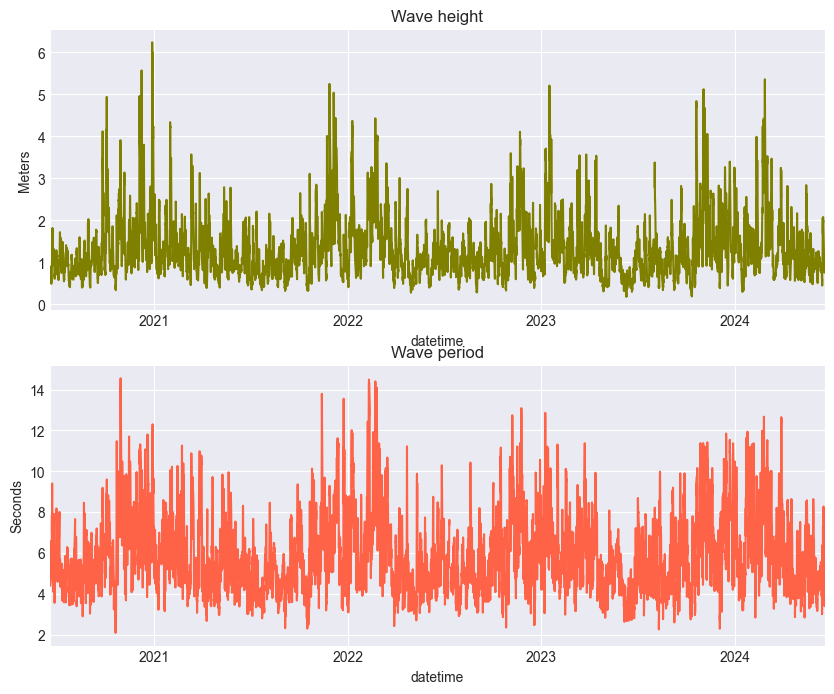

In [27]:
# Plot raw data
# ==============================================================================
fig, ax = plt.subplots(2,1, figsize = (10,8))

df['wave_height'].plot(ax=ax[0], color = 'olive')
df['period'].plot(ax=ax[1], color = 'tomato')

ax[0].set_title('Wave height')
ax[0].set_ylabel('Meters')
ax[1].set_title('Wave period')
ax[1].set_ylabel('Seconds')
plt.plot()

[]

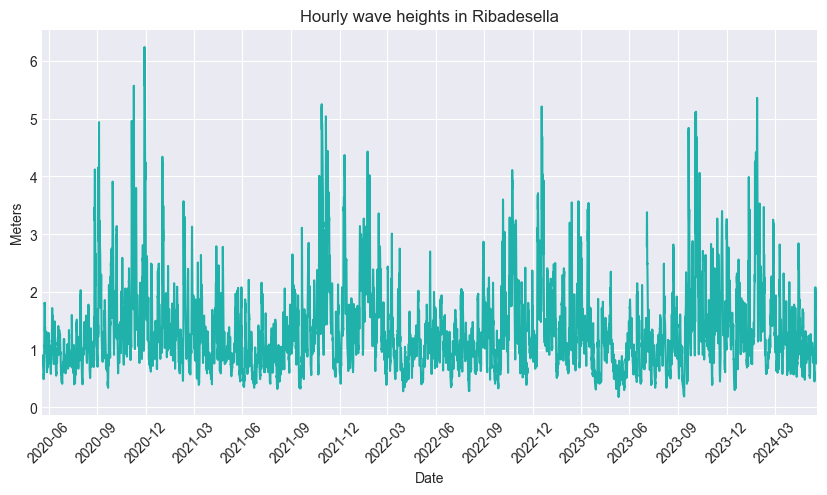

In [28]:
# Plot raw data
# ==============================================================================
fig, ax = plt.subplots(1,1, figsize = (10,5))

df['wave_height'].plot(ax=ax, color = 'lightseagreen')

ax.set_title('Hourly wave heights in Ribadesella')
ax.set_ylabel('Meters')
ax.set_xlabel('Date')

# Add more ticks to the x-axis
ax.set_xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='3M'))
ax.set_xticklabels(pd.date_range(start=df.index.min(), end=df.index.max(), freq='3M').strftime('%Y-%m'), rotation=45)

# Add grid
ax.grid(True)

plt.plot()

In [6]:
df.isnull().value_counts()

wave_height  period
False        False     34848
True         True        240
Name: count, dtype: int64

In [7]:
df[df['wave_height'].isnull()]

,wave_height,period
datetime,,
2020-08-25 13:00:00,NaN,NaN
2020-08-25 14:00:00,NaN,NaN
2020-08-25 15:00:00,NaN,NaN
2020-08-25 16:00:00,NaN,NaN
2020-08-25 17:00:00,NaN,NaN
...,...,...
2023-11-16 20:00:00,NaN,NaN
2023-11-16 21:00:00,NaN,NaN
2023-11-16 22:00:00,NaN,NaN


Since there aren't a lot of missing values relative to the sample size, I am going to impute them with the weekly average. I don't think this will have a huge impact on the predictive ability of the model. More importantly, the null values do not seem to leak into our validation or test sets (which will only start in 2024, whereas the last missing value is in 2023)

In [8]:
# Impute missing values
# ==============================================================================
# for col in df.columns:
#     df[col] = df[col].fillna(df[col].shift(24))

def fill_null_with_weekly_average(df, column_names):
    # Ensure the index is a DateTimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    for column_name in column_names:

        # Calculate the weekly average
        weekly_avg = df[column_name].resample('W').mean()

        # Forward-fill the weekly average to match the original index
        weekly_avg_filled = weekly_avg.reindex(df.index, method='ffill')

        # Fill null values in the original series with the corresponding weekly average
        df[column_name].fillna(weekly_avg_filled, inplace=True)

    return df

df = fill_null_with_weekly_average(df, ['wave_height', 'period'])

df.isnull().value_counts()

wave_height  period
False        False     35088
Name: count, dtype: int64

In [9]:
# Train-test split
# ==============================================================================
one_month = (-1)*30*24 # One month
two_months = (-1)*60*24 # Two months

end_train = two_months + two_months
end_val = two_months

df_train = df.iloc[:end_train].copy()
df_val = df.iloc[end_train:end_val].copy()
df_test = df.iloc[end_val:].copy()

print(f"Train dates      : {df_train.index.min()} --- {df_train.index.max()}  (n={len(df_train)})")
print(f"Validation dates : {df_val.index.min()} --- {df_val.index.max()}  (n={len(df_val)})")
print(f"Test dates       : {df_test.index.min()} --- {df_test.index.max()}  (n={len(df_test)})")

Train dates      : 2020-06-18 00:00:00 --- 2024-02-19 23:00:00  (n=32208)
Validation dates : 2024-02-20 00:00:00 --- 2024-04-19 23:00:00  (n=1440)
Test dates       : 2024-04-20 00:00:00 --- 2024-06-18 23:00:00  (n=1440)


In [10]:
# Interactive plot of clean and split time series
# ==============================================================================
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train.index, y=df_train['wave_height'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=df_val.index, y=df_val['wave_height'], mode='lines', name='Validation'))
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['wave_height'], mode='lines', name='Test'))
fig.update_layout(
    title  = '60-minute average wave height',
    xaxis_title="Time",
    yaxis_title="Meters",
    legend_title="Partition:",
    width=850,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.001
    )
)
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

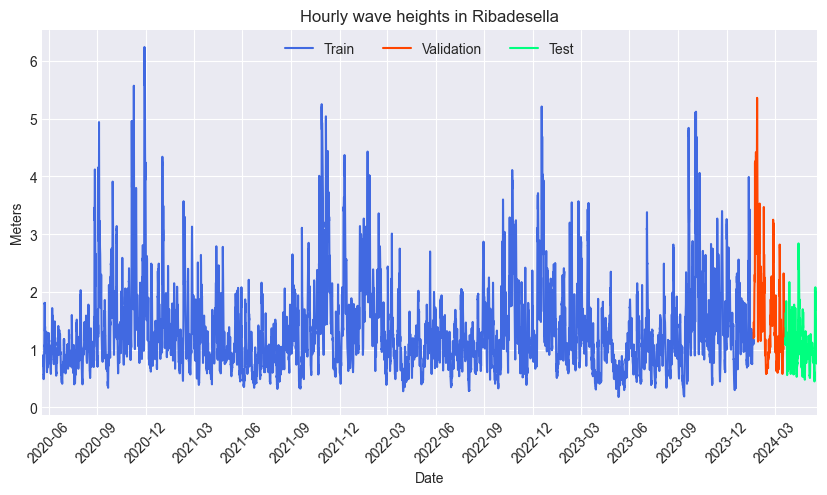

In [29]:

# Plot raw data using seaborn
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.lineplot(data=df_train, x=df_train.index, y='wave_height', ax=ax, label='Train', color='royalblue')
sns.lineplot(data=df_val, x=df_val.index, y='wave_height', ax=ax, label='Validation', color='orangered')
sns.lineplot(data=df_test, x=df_test.index, y='wave_height', ax=ax, label='Test', color='springgreen')

ax.set_title('Hourly wave heights in Ribadesella')
ax.set_ylabel('Meters')
ax.set_xlabel('Date')

# Add more ticks to the x-axis
ax.set_xticks(pd.date_range(start=df.index.min(), end=df.index.max(), freq='3M'))
ax.set_xticklabels(pd.date_range(start=df.index.min(), end=df.index.max(), freq='3M').strftime('%Y-%m'), rotation=45)

# Add grid
# ax.grid(True)

# Set x-axis limits to remove blank space
ax.set_xlim(df.index.min(), df.index.max())


# Customize legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)
legend.get_frame().set_facecolor('white')
# legend.get_frame().set_edgecolor('black')  # Optional: set the edge color to black for better visibility

plt.show()


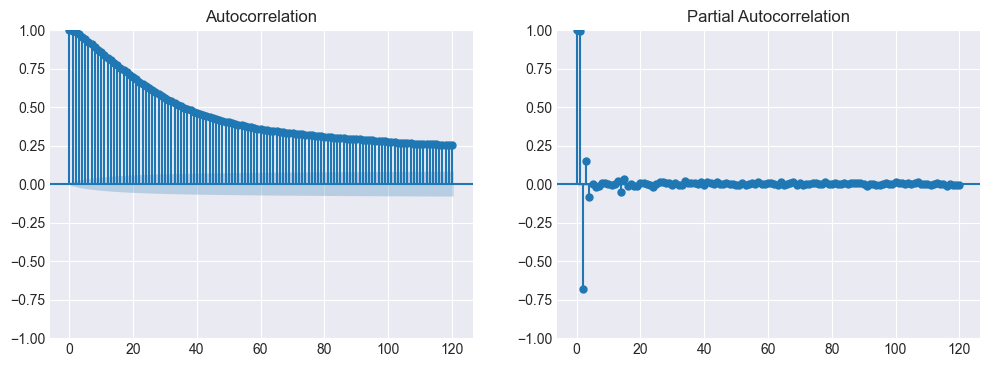

In [27]:
# ACF and PACF
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df['wave_height'], ax=ax[0], lags=120)
plot_pacf(df['wave_height'], ax=ax[1], lags=120)

plt.show()

In [28]:
# Save data
# ==============================================================================
df.to_csv(data_dir + '/spain_clean.csv')

In [32]:
df.tail()

,wave_height,period
datetime,,
2024-06-18 19:00:00,0.93,3.61
2024-06-18 20:00:00,0.92,3.82
2024-06-18 21:00:00,0.86,4.08
2024-06-18 22:00:00,0.84,4.20
2024-06-18 23:00:00,0.82,4.23
